<a href="https://colab.research.google.com/github/alexinacio2000/rede-neural-tensorFlow/blob/main/IA_BOASAFRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inteligência Artificial Boa Safra

In [ ]:
!pip install opencv-python-headless




```

```

# Alex


Utilizado biblioteca tensor flow

In [ ]:
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np


#Função usando JS e python



<IPython.core.display.Javascript object>

Saved to photo.jpg


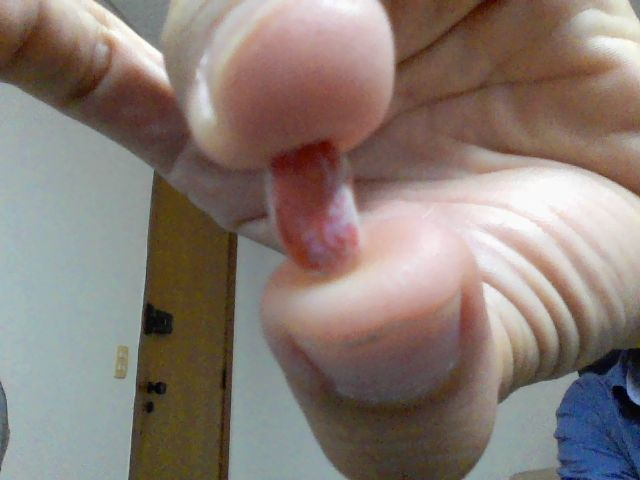

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();


        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capturar uma imagem da câmera
photo_filename = take_photo()
print(f"Saved to {photo_filename}")

# Carregar a imagem capturada
image = cv2.imread(photo_filename)

# Mostrar a imagem capturada
cv2_imshow(image)


#Carregar modelo Keras_5 modelo está dentro da Biblioteca Tensor flow

In [ ]:
# Carregar o modelo treinado
model = tf.keras.models.load_model('keras_model.h5')

# Função para pré-processar a imagem
def preprocess_image(image, target_size):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Pré-processar a imagem capturada
preprocessed_image = preprocess_image(image, (224, 224))
image = cv2.blur(image, (5, 5))

# Fazer a previsão
prediction = model.predict(preprocessed_image)


1/1 [==============================] - 2s 2s/step


#IF para determinar padrão

In [ ]:
# Interpretar a previsão
predicted_class = np.argmax(prediction, axis=1)[0]

if predicted_class == 1:
    print("O feijão é vermelho.")
else:
    print("O feijão é azul.")


O feijão é azul.
